In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pm import *
import cv2

In [5]:
fontanna_1 = cv2.imread("fontanna1.jpg", 0)
fontanna_2 = cv2.imread("fontanna2.jpg", 0)

fontanna_1_H = compute_H(fontanna_1, 7)
fontanna_2_H = compute_H(fontanna_2, 7)

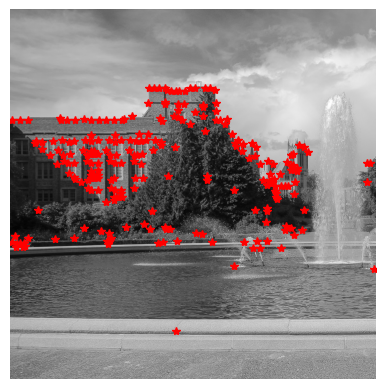

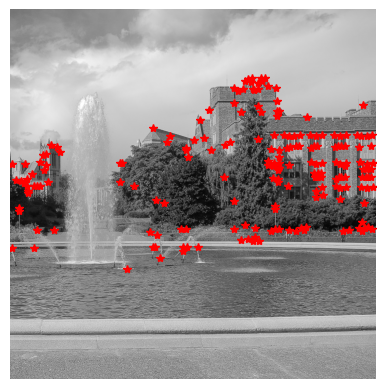

In [6]:
f1_H_max = find_max(fontanna_1_H, 7, 0.4)
f2_H_max = find_max(fontanna_2_H, 7, 0.4)
    
show_img_with_points(fontanna_1, f1_H_max)
show_img_with_points(fontanna_2, f2_H_max)

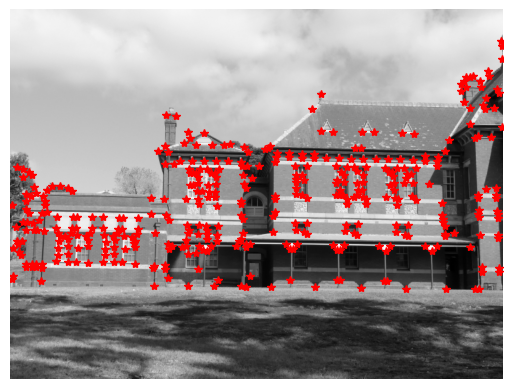

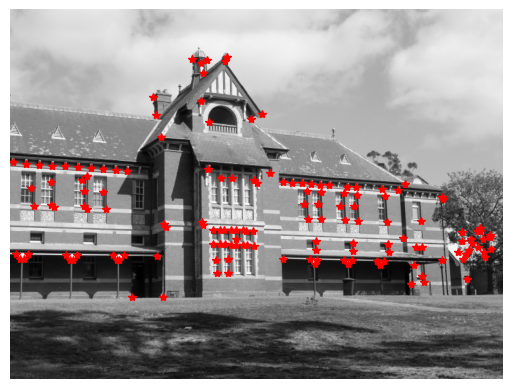

In [7]:
budynek_1 = cv2.imread("budynek1.jpg", 0)
budynek_2 = cv2.imread("budynek2.jpg", 0)

budynek_1_H = compute_H(budynek_1, 7)
budynek_2_H = compute_H(budynek_2, 7)

b1_H_max = find_max(budynek_1_H, 7, 0.4)
b2_H_max = find_max(budynek_2_H, 7, 0.4)

show_img_with_points(budynek_1, b1_H_max)
show_img_with_points(budynek_2, b2_H_max)

In [8]:
f1_desc = descriptors(fontanna_1, f1_H_max, k_size=15)
f2_desc = descriptors(fontanna_2, f2_H_max, k_size=15)

f_matches = match_descriptors(f1_desc, f2_desc, n=30)

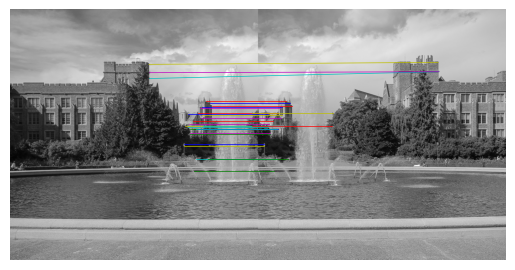

In [9]:
plot_matches(fontanna_1, fontanna_2, f_matches)

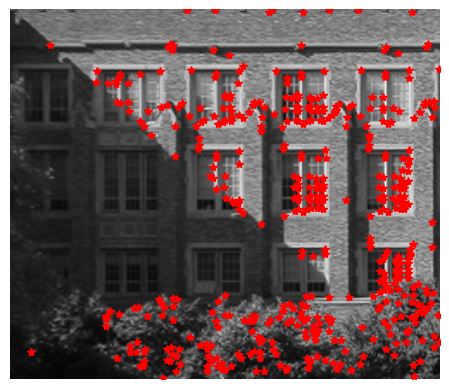

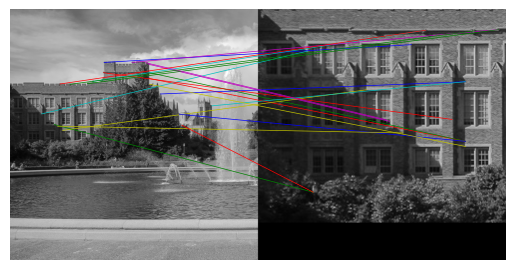

In [10]:
fontanna_pow = cv2.imread("fontanna_pow.jpg", 0)

fontanna_pow_H = compute_H(fontanna_pow, 7)
fpow_H_max = find_max(fontanna_pow_H, 7, 0.4)
show_img_with_points(fontanna_pow, fpow_H_max)
fpow_desc = descriptors(fontanna_pow, fpow_H_max, k_size=15)
fpow_matches = match_descriptors(f1_desc, fpow_desc, n=20)
plot_matches(fontanna_1, fontanna_pow, fpow_matches)

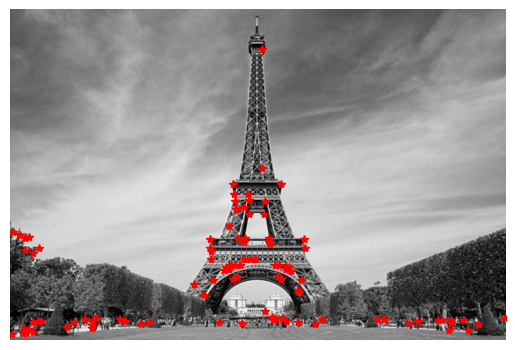

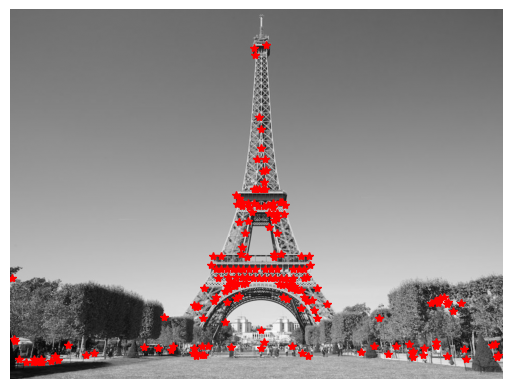

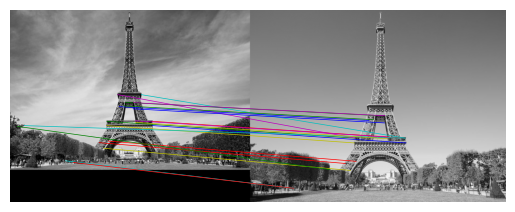

In [11]:
def match_harris(img1, img2, H_size=7, threshold=0.4, desc_size=15, n=20):
    img1_H = compute_H(img1, H_size)
    img2_H = compute_H(img2, H_size)
    img1_H_max = find_max(img1_H, H_size, threshold)
    img2_H_max = find_max(img2_H, H_size, threshold)
    show_img_with_points(img1, img1_H_max)
    show_img_with_points(img2, img2_H_max)
    img1_desc = descriptors(img1, img1_H_max, k_size=desc_size)
    img2_desc = descriptors(img2, img2_H_max, k_size=desc_size)
    img_matches = match_descriptors(img1_desc, img2_desc, n=n)
    plot_matches(img1, img2, img_matches)
    
eiffel_1 = cv2.imread("eiffel1.jpg", 0)
eiffel_2 = cv2.imread("eiffel2.jpg", 0)

match_harris(eiffel_1, eiffel_2, n=20)

# ORB

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pm import *
import cv2

In [15]:
fontanna_1 = cv2.imread("fontanna1.jpg", 0)
fontanna_2 = cv2.imread("fontanna2.jpg", 0)

def fast_points(gray, t=20, fast_n=9):
    points = []
    for y in range(3, gray.shape[0] - 3):
        for x in range(3, gray.shape[1] - 3):
            center_val = gray[y, x]
            circle = [gray[y+3, x], gray[y+3, x+1], gray[y+2, x+2], gray[y+1, x+3], gray[y, x+3], gray[y-1, x+3],
                      gray[y-2, x+2], gray[y-3, x+1], gray[y-3, x], gray[y-3, x-1], gray[y-2, x-2], 
                      gray[y-1, x-3], gray[y, x-3], gray[y+1, x-3], gray[y+2, x-2], gray[y+3, x-1]]
            
            length = 16
            for i in range(length):
                next_points_vals = [circle[(i + j) % length] for j in range(1, fast_n + 1)]
                if all((point_val > center_val + t) for point_val in next_points_vals) or all((point_val < center_val - t) for point_val in next_points_vals):
                    points.append((y,x))
                    break
            
    points_with_harris = []
    harris = compute_H(gray, normalize=False)  # metryka Harrisa
    for y, x in points:
        points_with_harris.append((y, x, harris[y, x]))

    points_with_harris_sorted = sorted(points_with_harris, key=lambda x: x[2], reverse=True)
    return points_with_harris_sorted

f1_fast_points = fast_points(fontanna_1, t=20)
print(len(f1_fast_points))



32488


In [18]:
kwadrat = cv2.imread("kwadrat.png", 0)

k_fast_points = fast_points(kwadrat, t=20)
print(len(k_fast_points))

24


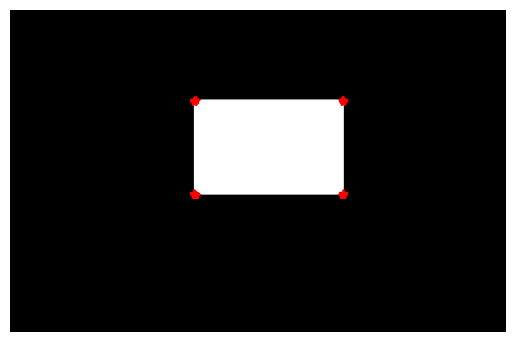

In [19]:
fast_points_x = [x for _, x, _ in k_fast_points[:]]
fast_points_y = [y for y, _, _ in k_fast_points[:]]
show_img_with_points(kwadrat, (fast_points_y, fast_points_x))

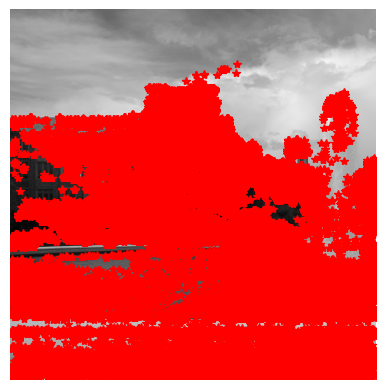

In [34]:
fast_points_x = [x for _, x, _ in f1_fast_points[:]]
fast_points_y = [y for y, _, _ in f1_fast_points[:]]
show_img_with_points(fontanna_1, (fast_points_y, fast_points_x))

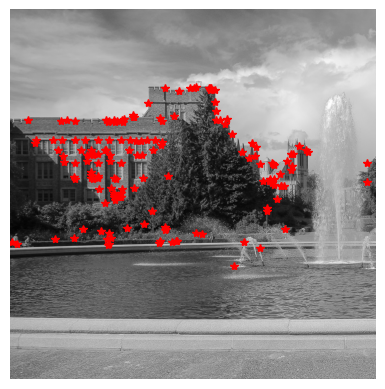

160


In [24]:
f1_filtered_points = non_maximum_suppression(f1_fast_points[:500])
filtered_points_x = [x for _, x, _ in f1_filtered_points]
filtered_points_y = [y for y, _, _ in f1_filtered_points]
show_img_with_points(fontanna_1, (filtered_points_y, filtered_points_x))
print(len(f1_filtered_points))

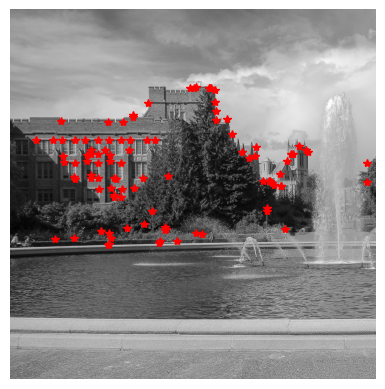

100


In [25]:
def filter_by_neighborhood(points, img_shape, n=20):
    size = 31
    r = size // 2
    filtered_points = [(y, x, metric) for (y, x, metric) in points if (y >= r and y < img_shape[0] - r and x >= r and r < img_shape[1] - r)]
    return filtered_points[:n] if len(filtered_points) >= n else filtered_points


f1_filtered_points = filter_by_neighborhood(f1_filtered_points, fontanna_1.shape, n=100)
filtered_points_x = [x for _, x, _ in f1_filtered_points]
filtered_points_y = [y for y, _, _ in f1_filtered_points]
show_img_with_points(fontanna_1, (filtered_points_y, filtered_points_x))
print(len(f1_filtered_points))

In [ ]:
# Usuń
# f1_filtered_points = f1_filtered_points[:20] if len(f1_filtered_points) >= 20 else f1_filtered_points
# print(f1_filtered_points)

[(488, 352, 134782265221246.19), (214, 433, 105602758731614.19), (232, 433, 103491487876988.8), (360, 544, 101985265120558.19), (492, 312, 92588144632031.2), (463, 578, 81593423547788.8), (417, 540, 81191213317592.8), (458, 325, 78803024665711.8), (354, 219, 75694753013731.2), (488, 315, 73675973066432.0), (303, 170, 71851872701932.0), (495, 205, 66306761878319.8), (355, 184, 63761167330659.2), (164, 388, 62840438439139.2), (483, 94, 62654348361982.2), (222, 258, 61285783781439.2), (424, 540, 60212865748760.8), (360, 547, 59823194018700.8), (165, 423, 59504566982860.8), (378, 235, 58808447466223.8)]


In [26]:
def centorids(gray, fast_points):
    centroids = list()
    orientations = list()
    win_size = 31
    r = win_size // 2
    for (y, x, _) in fast_points:
        window = gray[y - r : y + r + 1, x - r : x + r + 1]
        m00 = 0
        m01 = 0
        m10 = 0
        for win_y in range(win_size):
            for win_x in range(win_size):
                if win_y ** 2 + win_x ** 2 <= r ** 2:
                    m00 += window[win_y, win_x]
                    m01 += (win_y - r) * window[win_y, win_x]
                    m10 += (win_x - r) * window[win_y, win_x]
                
        centroids.append((m10/m00, m01/m00))
        orientations.append(np.arctan2(m01, m10))
        
    return centroids, orientations

f1_centroids, f1_orientations = centorids(fontanna_1, f1_filtered_points)

print(f1_filtered_points)
print(f1_centroids)
print(f1_orientations)
        

[(488, 352, 134782265221246.19), (214, 433, 105602758731614.19), (232, 433, 103491487876988.8), (360, 544, 101985265120558.19), (492, 313, 89662876118268.8), (417, 540, 81191213317592.8), (458, 325, 78803024665711.8), (354, 219, 75694753013731.2), (488, 315, 73675973066432.0), (303, 170, 71851872701932.0), (462, 578, 66994766310963.2), (495, 205, 66306761878319.8), (355, 184, 63761167330659.2), (483, 94, 62654348361982.2), (222, 258, 61285783781439.2), (165, 423, 59504566982860.8), (378, 235, 58808447466223.8), (354, 170, 58733987852216.8), (165, 419, 57993247255558.2), (275, 305, 57182823164928.0), (299, 626, 57078806801408.0), (194, 432, 55147164835827.2), (164, 387, 54478959158431.2), (296, 622, 54028326485688.8), (376, 212, 53435069353311.2), (303, 184, 53016134903320.8), (322, 136, 51163704529942.2), (319, 162, 51003824269100.0), (423, 540, 50947050165971.95), (378, 186, 50617969207990.2), (461, 327, 50421120235724.8), (470, 207, 49845848042031.8), (304, 596, 49013220274391.8), (3

In [27]:
def brief(gray, fast_points, fast_centroids, fast_orientations, orb_points):
    win_size = 31
    r = win_size // 2
    descriptors = list()
    for i, (y, x, _) in enumerate(fast_points):
        window = gray[y - r : y + r + 1, x - r : x + r + 1]
        window = cv2.GaussianBlur(window, (5,5), 1)
        vec_bin = np.zeros(256)
        for j, (x1_orb, y1_orb, x2_orb, y2_orb) in enumerate(orb_points):
            new_x1 = x1_orb * np.cos(fast_orientations[i]) - y1_orb * np.sin(fast_orientations[i])
            new_x2 = x2_orb * np.cos(fast_orientations[i]) - y2_orb * np.sin(fast_orientations[i])
            new_y1 = x1_orb * np.cos(fast_orientations[i]) + y1_orb * np.sin(fast_orientations[i])
            new_y2 = x2_orb * np.cos(fast_orientations[i]) + y2_orb * np.sin(fast_orientations[i])
            
            test = window[int(new_x1), int(new_y1)] < window[int(new_x2), int(new_y2)]
            vec_bin[j] = test
        
        descriptors.append((y, x, vec_bin))
    
    return descriptors
    


In [28]:
orb_points = np.loadtxt('orb_descriptor_positions.txt')
print(orb_points)

[[  8.  -3.   9.   5.]
 [  4.   2.   7. -12.]
 [-11.   9.  -8.   2.]
 ...
 [  9.  -7.  10.  -2.]
 [  7.   0.  12.  -2.]
 [ -1.  -6.   0. -11.]]


In [29]:
f1_descriptors = brief(fontanna_1, f1_filtered_points, f1_centroids, f1_orientations, orb_points)

In [30]:
def hamming_comp(descriptors_1, descriptors_2, n=10):
    distances = list()
    for y1, x1, desc1 in descriptors_1:
        min_diff = float('inf')
        min_y, min_x = 0, 0
        for y2, x2, desc2 in descriptors_2:
            diff = np.count_nonzero(desc1 != desc2)
            if diff < min_diff:
                min_diff = diff
                min_y, min_x = y2, x2
        distances.append((y1, x1, min_y, min_x, min_diff))
    return sorted(distances, key=lambda x: x[4])[:n]

In [31]:
f2_fast_points = fast_points(fontanna_2, t=20)
f2_filtered_points = non_maximum_suppression(f2_fast_points[:500])
f2_filtered_points = filter_by_neighborhood(f2_filtered_points, fontanna_2.shape, n=100)
# f2_filtered_points = f2_filtered_points[:20] if len(f2_filtered_points) >= 20 else f2_filtered_points  # Usuń
f2_centroids, f2_orientations = centorids(fontanna_2, f2_filtered_points)
f2_descriptors = brief(fontanna_2, f2_filtered_points, f2_centroids, f2_orientations, orb_points)


In [32]:
f_distances = hamming_comp(f1_descriptors, f2_descriptors)

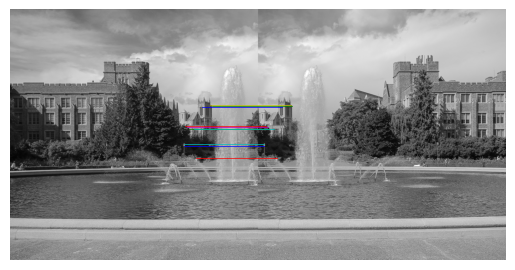

In [33]:
matches_points = [((y1, x1), (y2, x2)) for y1, x1, y2, x2, _ in f_distances]
plot_matches(fontanna_1, fontanna_2, matches_points)

In [28]:
def full_orb(img1, img2, n=10):
    orb_points = np.loadtxt('orb_descriptor_positions.txt')
    
    img1_fast_points = fast_points(img1, t=30, points_n=100)
    img1_filtered_points = non_maximum_suppression(img1_fast_points)
    img1_filtered_points = filter_by_neighborhood(img1_filtered_points, img1.shape)
    img1_centroids, img1_orientations = centorids(img1, img1_filtered_points)
    img1_descriptors = brief(img1, img1_filtered_points, img1_centroids, img1_orientations, orb_points)
    
    img2_fast_points = fast_points(img2, t=30, points_n=100)
    img2_filtered_points = non_maximum_suppression(img2_fast_points)
    img2_filtered_points = filter_by_neighborhood(img2_filtered_points, img2.shape)
    img2_centroids, img2_orientations = centorids(img2, img2_filtered_points)
    img2_descriptors = brief(img2, img2_filtered_points, img2_centroids, img2_orientations, orb_points)
    
    imgs_distances = hamming_comp(img1_descriptors, img2_descriptors)
    
    matches_points = [((y1, x1), (y2, x2)) for y1, x1, y2, x2, _ in imgs_distances]
    plot_matches(img1, img2, matches_points)

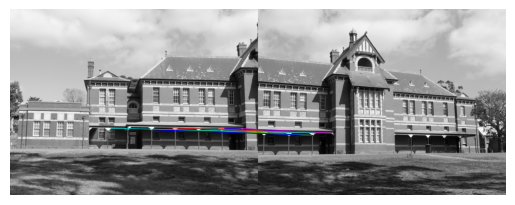

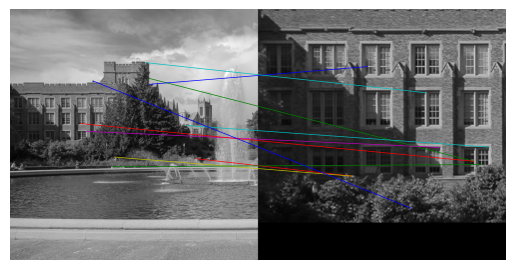

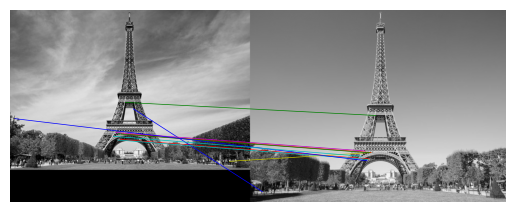

In [29]:
full_orb(budynek_1, budynek_2)
full_orb(fontanna_1, fontanna_pow)
full_orb(eiffel_1, eiffel_2)


## SIFT

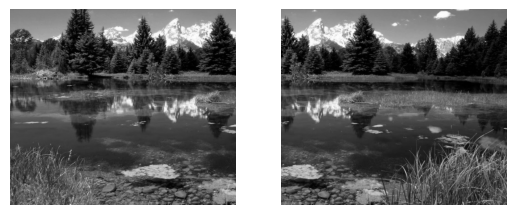

In [31]:
panorama_l = cv2.imread('left_panorama.jpg', cv2.IMREAD_GRAYSCALE)
panorama_r = cv2.imread('right_panorama.jpg', cv2.IMREAD_GRAYSCALE)

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(panorama_r, cmap='gray')
ax1.axis('off')
ax2.imshow(panorama_l, cmap='gray')
ax2.axis('off')
plt.show()

(-0.5, 815.5, 708.5, -0.5)

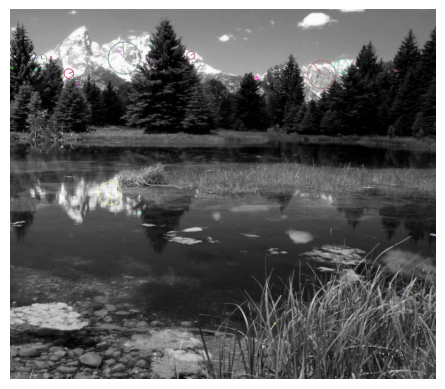

In [32]:
detector = cv2.SIFT_create(50)
points_l, descriptors_l = detector.detectAndCompute(panorama_l, None)
points_r, descriptors_r = detector.detectAndCompute(panorama_r, None)
img = cv2.drawKeypoints(panorama_l, points_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)
plt.axis('off')

(-0.5, 1633.5, 709.5, -0.5)

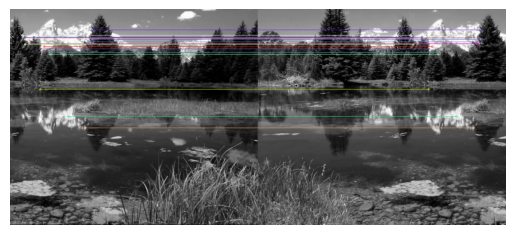

In [33]:
bf_matcher = cv2.BFMatcher(cv2.NORM_L2)
matches = bf_matcher.knnMatch(descriptors_l, descriptors_r, k=2)

best_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        best_matches.append([m])

img_matches = cv2.drawMatchesKnn(panorama_l, points_l, panorama_r, points_r, best_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.axis('off')

(-0.5, 1279.5, 709.5, -0.5)

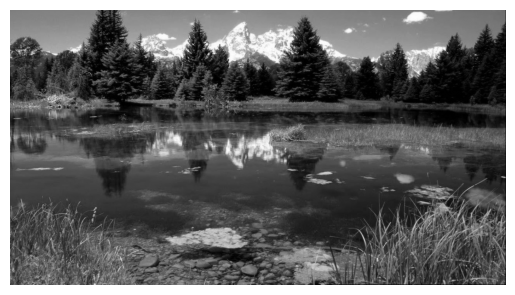

In [34]:
keypointsL = np.float32([kp.pt for kp in points_l])
keypointsR = np.float32([kp.pt for kp in points_r])

ptsA = np.float32([keypointsL[m.queryIdx] for m, _ in matches])
ptsB = np.float32([keypointsR[m.trainIdx] for m, _ in matches])

H, _ = cv2.findHomography(ptsA, ptsB, cv2.RANSAC)

result = cv2.warpPerspective(panorama_l , H, (panorama_l.shape[1] + panorama_r.shape[1] - 354, panorama_r.shape[0]))
result[0: panorama_r.shape[0] , 0:panorama_r.shape[1]] = panorama_r
plt.imshow(result, cmap='gray')
plt.axis('off')